<a href="https://colab.research.google.com/github/sonjoy2074/InsurancePrediction/blob/main/Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

**Load dataset**

In [2]:
# prompt: connect with drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df =pd.read_csv('/content/drive/MyDrive/InsuranceDataset/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [10]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


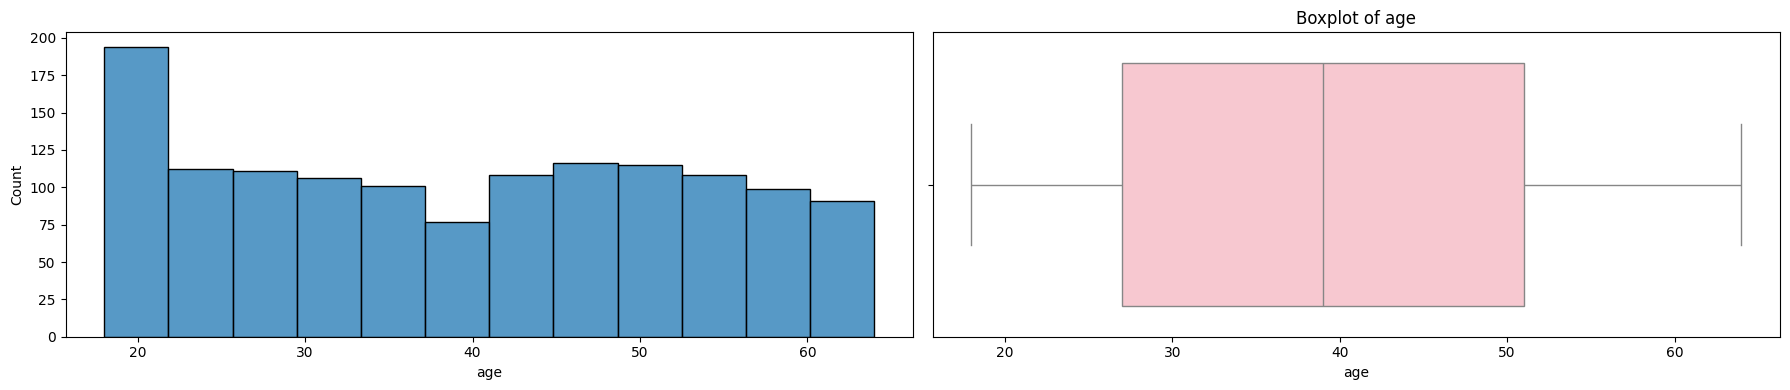

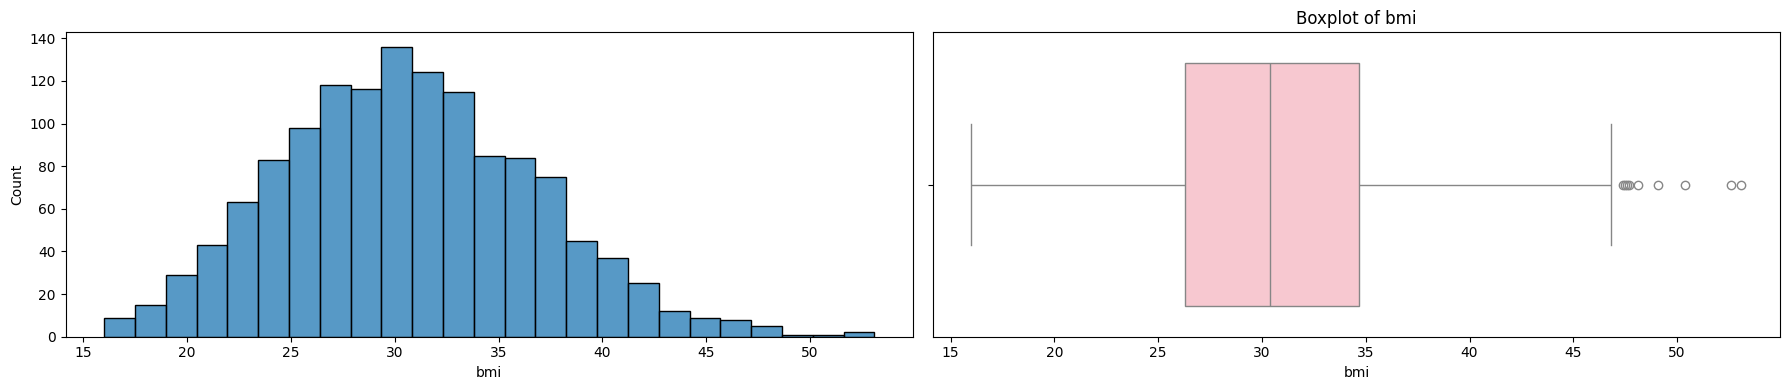

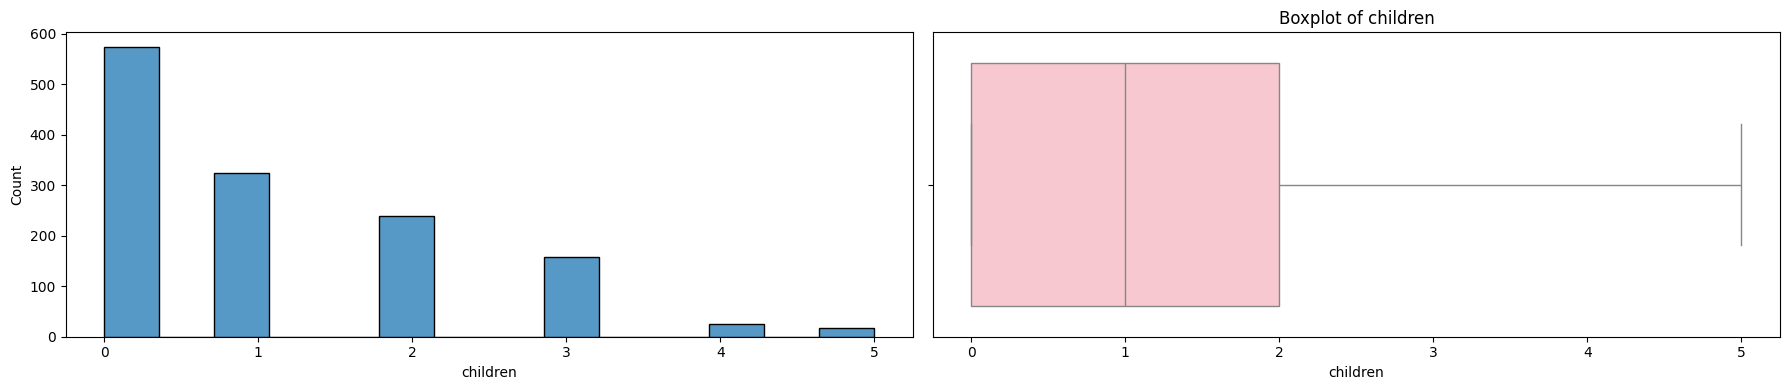

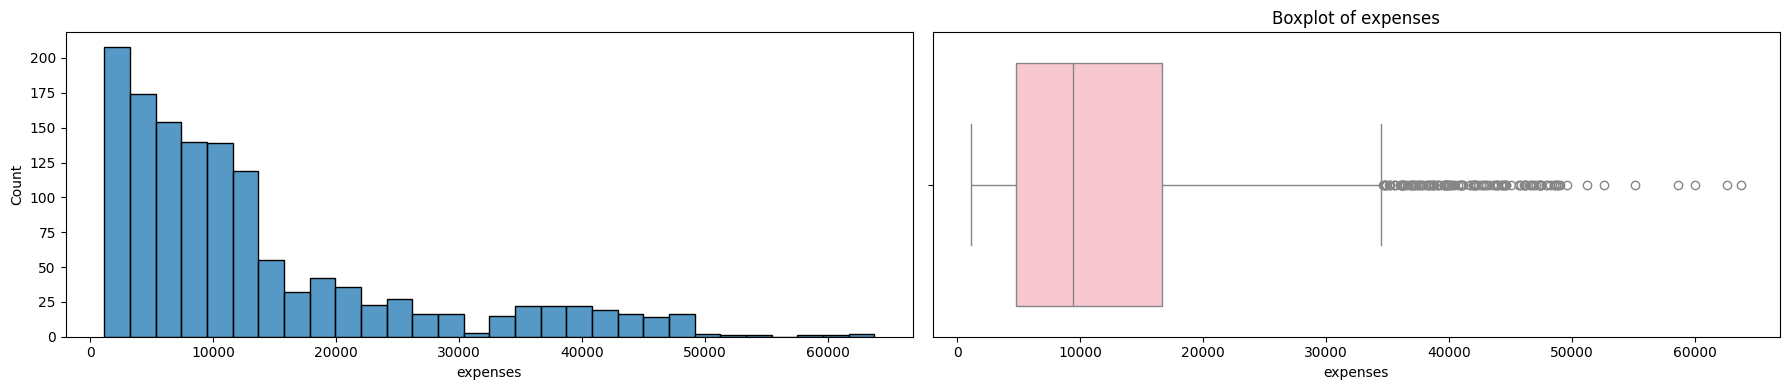

In [11]:
x_axis = ['age', 'bmi', 'children', 'expenses']

for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))  # Create subplots
    sns.histplot(df[x], ax=axes[0], kde=False)       # Use histplot for compatibility
    sns.boxplot(df[x], ax=axes[1], orient="h", color="pink")  # Fixed syntax
    axes[1].set_title(f'Boxplot of {x}')             # Add title for clarity
    plt.tight_layout()                               # Adjust layout
    plt.show()


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [14]:
df['sex'] = df.sex.map({'male':0, 'female':1})

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,yes,southwest,16884.92
1,18,0,33.8,1,no,southeast,1725.55
2,28,0,33.0,3,no,southeast,4449.46
3,33,0,22.7,0,no,northwest,21984.47
4,32,0,28.9,0,no,northwest,3866.86


In [16]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [17]:
df['smoker'] = df.smoker.map({'yes':0, 'no':1})

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,southwest,16884.92
1,18,0,33.8,1,1,southeast,1725.55
2,28,0,33.0,3,1,southeast,4449.46
3,33,0,22.7,0,1,northwest,21984.47
4,32,0,28.9,0,1,northwest,3866.86


In [19]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
df['region'] = df.region.map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,2,1725.55
2,28,0,33.0,3,1,2,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


**Split the dataset**

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [24]:
x = df.drop(['expenses'], axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,0,1
1,18,0,33.8,1,1,2
2,28,0,33.0,3,1,2
3,33,0,22.7,0,1,3
4,32,0,28.9,0,1,3


In [25]:
y=df[['expenses']]
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


**Train test split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(1070, 6)

In [29]:
x_test.shape

(268, 6)

**Model traning**

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred=lr.predict(x_test)

In [34]:
from sklearn.metrics import r2_score
score1=r2_score(y_test, y_pred)
score1

0.7833214205203848

In [35]:
from sklearn.svm import SVR

In [36]:
svm=SVR()
svm.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [37]:
y_pred=svm.predict(x_test)
from sklearn.metrics import r2_score
score2=r2_score(y_test, y_pred)
score2

-0.07229036523739962

In [38]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [39]:
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
score3=r2_score(y_test, y_pred)
score3

0.8661881055967185

**Random Forest is selected is random forest**

In [40]:
rf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [41]:
data={
    'age':40,
    'sex':1,
    'bmi':40.30,
    'children':4,
    'smoker':1,
    'region':2
}
new_df=pd.DataFrame(data, index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [44]:
pred= rf.predict(new_df)
pred[0]

8587.3209

In [46]:
#save model
import joblib
joblib.dump(rf,'/content/drive/MyDrive/InsuranceDataset/model/model.joblib')

['/content/drive/MyDrive/InsuranceDataset/model/model.joblib']